In [1]:
import numpy as np
import torch
import torchvision
from torchvision import datasets,models,transforms
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt
import os
                                                                

In [2]:
from torch.optim import lr_scheduler #内置的自动学习速率下降库

In [7]:
models=torchvision.models.vgg16(pretrained=True)

In [8]:
models

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
for p in models.features.parameters():
    p.requires_grad=False

In [5]:
models.classifier[-1].out_features=4 #将最后一层的输出改为需要的4

In [6]:
optim=torch.optim.Adam(models.classifier.parameters(),lr=0.001) #只对最后一个分类器的参数进行优化
loss_fn=nn.CrossEntropyLoss()


In [7]:
for p in optim.param_groups:
    p['lr']*=0.9

In [6]:
# if torch.cuda.is_available():
#     models.to('cuda')

In [30]:
device=torch.device("cuda:0"if torch.cuda.is_available() else "cpu") #要不就是第0个显卡，要不就是cpu
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
base_dir=r'D:/python/dataset/4weather'#定义数据集的基准地址

In [8]:
os.listdir(os.path.join(base_dir,"train"))

['cloudy', 'rain', 'shine', 'sunrise']

In [9]:
train_transform=transforms.Compose([
    transforms.Resize(224), #先裁剪成一个大一点的图片再随机裁剪成192x192的
    transforms.RandomCrop(192),#随机裁剪成192的
    transforms.RandomHorizontalFlip(),#加一个随机的左右翻转
    transforms.RandomRotation(0.2),#随机旋转20度
   
    transforms.ColorJitter(brightness=0.5),#随机调整亮度，0.5是超参数，需要自己去更改
    transforms.ColorJitter(contrast=0.5),
    transforms.ToTensor(),#规范到0到1之间    必须放在最后Normalize之前，否则会报错
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]) #标准化   从0~1转化成-1~1  
                                #两个参数分别是均值和方差，如果事先了解数据集的可以直接填上，不了解就写个大概
                                #当模型出现过拟合时，用来降低模型的复杂度
])

In [10]:
test_transform=transforms.Compose([
    transforms.Resize((96,96)), #把图片大小统一成96*96   要加两个括号！！！一个是函数的括号，一个是参数的括号
    transforms.ToTensor(),#规范到0到1之间
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]) #标准化   从0~1转化成-1~1
                                #两个参数分别是均值和方差，如果事先了解数据集的可以直接填上，不了解就写个大概
])

In [11]:
train_dir=os.path.join(base_dir,'train') 
text_dir=os.path.join(base_dir,'text')

In [13]:
train_ds=torchvision.datasets.ImageFolder(
    train_dir,                      #两个参数，一个是目录地址，一个是变形方法
    transform=train_transform  

)
text_ds=torchvision.datasets.ImageFolder(
    text_dir,                      #两个参数，一个是目录地址，一个是变形方法
    transform=test_transform  

)

In [14]:
train_dl=DataLoader(train_ds,batch_size=32,shuffle=True)
text_dl=DataLoader(text_ds,batch_size=32)

In [15]:
imgs,labels=next(iter(train_dl)) #这是取一个batchsize内的

In [16]:
labels[15]

tensor(2)

In [32]:
def fit(epoch,model,trainloader,textloader):   
    correct=0                            
    total=0                              
    running_loss=0
    model.train()      #一定要加这一句表明模型正处于训练状态下    
    for x,y in trainloader: 
        x,y=x.to(device),y.to(device)   
        y_pred=model(x)
        loss=loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        with torch.no_grad():                  
            y_pred=torch.argmax(y_pred,dim=1)
            correct+=(y_pred==y).sum().item()  
            total+=y.size(0)                   
            running_loss+=loss.item()          
        
        epoch_acc=correct/total                
        epoch_loss=running_loss/len(trainloader.dataset)  
        
        
        text_correct=0                          
        text_total=0                              
        text_running_loss=0
        
        model.eval()      #告诉模型现在是预测模式，dropout层不需要发挥作用
        with torch.no_grad():                  
             for x,y in textloader:    
                x,y=x.to(device),y.to(device)  
                y_pred=model(x)
                loss=loss_fn(y_pred,y)
                y_pred=torch.argmax(y_pred,dim=1)
                text_correct+=(y_pred==y).sum().item() 
                text_total+=y.size(0)                   
                text_running_loss+=loss.item()
        
        epoch_text_acc=text_correct/text_total                
        epoch_text_loss=running_loss/len(textloader.dataset)  
        
        print('epoch: ',epoch,'loss: ',round(epoch_loss,3),
                              'accuracy: ',round(epoch_acc,3),
                              'text_loss: ',round(epoch_text_loss,3),
                              'text_accuracy: ',round(epoch_text_acc,3))
        return epoch_loss,epoch_acc,epoch_text_loss,epoch_text_acc  

In [33]:
train_acc=[]
train_loss=[]
text_acc=[]
text_loss=[]

In [34]:
for epoch in range(100):
    epoch_loss,epoch_acc,epoch_text_loss,epoch_text_acc=fit(epoch,model,train_dl,text_dl)
    train_acc.append(epoch_acc)
    train_loss.append(epoch_loss)
    text_acc.append(epoch_text_acc)
    text_loss.append(epoch_text_loss)

epoch:  0 loss:  0.002 accuracy:  0.281 text_loss:  0.006 text_accuracy:  0.462
epoch:  1 loss:  0.001 accuracy:  0.438 text_loss:  0.006 text_accuracy:  0.409
epoch:  2 loss:  0.001 accuracy:  0.5 text_loss:  0.005 text_accuracy:  0.462
epoch:  3 loss:  0.001 accuracy:  0.594 text_loss:  0.005 text_accuracy:  0.551
epoch:  4 loss:  0.001 accuracy:  0.469 text_loss:  0.005 text_accuracy:  0.524
epoch:  5 loss:  0.001 accuracy:  0.5 text_loss:  0.005 text_accuracy:  0.587
epoch:  6 loss:  0.001 accuracy:  0.5 text_loss:  0.005 text_accuracy:  0.64
epoch:  7 loss:  0.001 accuracy:  0.594 text_loss:  0.004 text_accuracy:  0.724
epoch:  8 loss:  0.001 accuracy:  0.656 text_loss:  0.004 text_accuracy:  0.764
epoch:  9 loss:  0.001 accuracy:  0.906 text_loss:  0.003 text_accuracy:  0.778
epoch:  10 loss:  0.001 accuracy:  0.781 text_loss:  0.004 text_accuracy:  0.8
epoch:  11 loss:  0.001 accuracy:  0.719 text_loss:  0.004 text_accuracy:  0.827
epoch:  12 loss:  0.001 accuracy:  0.906 text_l

KeyboardInterrupt: 

In [99]:
torch.cuda.is_available()

True

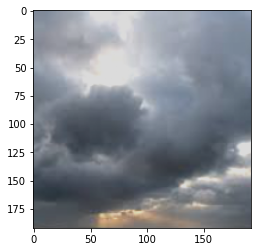

In [39]:
im=imgs[0].permute(1,2,0)
im=im.numpy()
im=(im+1)/2 
plt.imshow(im)

In [20]:
device

NameError: name 'device' is not defined

In [38]:
labels[0]

tensor(3)

In [44]:
models(imgs)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

# RESNET预训练模型

In [4]:
model=torchvision.models.resnet18(pretrained=True)

In [5]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
for p in model.parameters():
    p.requires_grad=False

In [7]:
in_f=model.fc.in_features #取出原模型的线性层参数中的输入参数
model.fc=nn.Linear(in_f,4)#根据原模型的输入参数进行线性层的替换，输出为4分类  这么替换的好处是这最后替换的最后一层是可以训练的

In [26]:
if torch.cuda.is_available():
    model.to('cuda')

In [27]:
device=torch.device("cuda:0"if torch.cuda.is_available() else "cpu") #要不就是第0个显卡，要不就是cpu

In [33]:
optim=torch.optim.Adam(model.fc.parameters(),lr=0.001) #只对最后一个线性层的参数进行优化
loss_fn=nn.CrossEntropyLoss()

# 预训练模型微调

In [41]:
model1=torchvision.models.resnet101(pretrained=True)

In [5]:
for p in model.parameters():
    p.requires_grad=False #关闭所有梯度只训练新加的分类器

in_f=model.fc.in_features #取出原模型的线性层参数中的输入参数
model.fc=nn.Linear(in_f,4)#根据原模型的输入参数进行线性层的替换，输出为4分类

In [31]:
from torch.optim import lr_scheduler
optim=torch.optim.Adam(model.fc.parameters(),lr=0.001)
exp_lr_scheduler=lr_scheduler.StepLR(optim,step_size=7,gamma=0.9)
loss_fn=nn.CrossEntropyLoss()

In [ ]:
for parm in model.parameters():
    parm.requires_grad=True  #在训练完分类器后打开梯度再进行整体的训练

# 保存模型

In [42]:
model1.state_dict()#返回一个字典，内容为模型的所有可训练参数

OrderedDict([('conv1.weight',
              tensor([[[[ 2.0222e-02, -4.3927e-03, -1.8274e-02,  ..., -1.5180e-02,
                         -1.5794e-03,  9.3115e-03],
                        [-4.0752e-03,  3.2116e-03, -1.5956e-02,  ..., -8.4465e-02,
                         -7.4997e-02, -4.0676e-02],
                        [ 3.5039e-03,  2.6746e-02,  5.0813e-02,  ...,  3.3407e-02,
                          1.3659e-02,  2.7821e-02],
                        ...,
                        [-3.6174e-02, -1.2986e-01, -3.0369e-01,  ..., -3.7412e-01,
                         -1.3025e-01,  4.2633e-02],
                        [ 1.5479e-02,  2.3444e-02,  6.5222e-03,  ..., -1.6439e-01,
                         -1.8245e-01, -9.7434e-02],
                        [-3.0444e-02, -1.1357e-02,  4.9984e-02,  ...,  1.6412e-01,
                          1.0419e-01, -1.2681e-02]],
              
                       [[ 8.7115e-03, -5.8911e-03, -1.2204e-02,  ..., -1.3515e-02,
                          1.5212

In [43]:
PATH='my_model.pth' #将模型权重保存再本目录下，一般权重文件都定义为 .pth/ .pt
torch.save(model1.state_dict(),PATH)  #使用torch中的函数保存参数 一定要加括号，否则会报错

In [44]:
new_model=torchvision.models.resnet101(pretrained=True)


In [45]:
new_model.load_state_dict(torch.load(PATH))#将权重参数加载进来,这样就可以使用训练好的权重了

<All keys matched successfully>

In [41]:
from torch.nn import functional as F

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv_1=nn.Conv2d(3,16,3)
        self.conv_2=nn.Conv2d(16,32,3)
        self.conv_3=nn.Conv2d(32,64,3)
        self.drop=nn.Dropout(0.5) #因为在linear使用的dropout，所以就用普通的就行，参数为丢弃掉的单元数（0.5就是50%）,一般添加在模型的后半部分
        self.pool=nn.MaxPool2d(2,2)
        self.linear1=nn.Linear(64*10*10,1024)
        self.linear2=nn.Linear(1024,256)
        self.linear3=nn.Linear(256,4)
    def forward(self,x):
        x=F.relu(self.conv_1(x))
        x=self.pool(x)
        x=F.relu(self.conv_2(x))
        x=self.pool(x)
        x=F.relu(self.conv_3(x))
        x=self.pool(x)
       # print(x.size())
        x=x.view(-1,x.size(1)*x.size(2)*x.size(3))
        x=F.relu(self.linear1(x))
        x=self.drop(x)
        x=F.relu(self.linear2(x))
        x=self.drop(x)                            #加在线性层之后
        x=self.linear3(x)
        return x
        

In [21]:
model=Net()

In [40]:
model.state_dict

<bound method Module.state_dict of Net(
  (conv_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (drop): Dropout(p=0.5, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=6400, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=4, bias=True)
)>

In [28]:
PATH='my_model.csv' #将模型权重保存再本目录下，一般权重文件都定义为 .pth/ .pt
torch.save(model.state_dict(),PATH)  #使用torch中的函数保存参数

In [29]:
model.load_state_dict(torch.load(PATH))#将权重参数加载进来,这样就可以使用训练好的权重了

<All keys matched successfully>

In [30]:
torch.load(PATH)

OrderedDict([('conv_1.weight',
              tensor([[[[-0.1111,  0.1492,  0.1571],
                        [-0.1228,  0.0227, -0.1542],
                        [-0.0195,  0.1511,  0.0624]],
              
                       [[-0.1419,  0.0133, -0.1021],
                        [-0.0970, -0.0742, -0.0534],
                        [-0.1264, -0.0740,  0.0144]],
              
                       [[ 0.1510, -0.1443, -0.0031],
                        [ 0.0998,  0.0737,  0.1267],
                        [-0.0962,  0.0466, -0.0285]]],
              
              
                      [[[ 0.0361,  0.1640, -0.1106],
                        [-0.1698, -0.0380, -0.1397],
                        [-0.0677,  0.1309,  0.0107]],
              
                       [[-0.0921,  0.0899,  0.1775],
                        [ 0.1393, -0.0746, -0.1072],
                        [ 0.0656,  0.0588, -0.0260]],
              
                       [[ 0.1655, -0.0758, -0.1424],
                        [

# 保存最优权重


In [46]:
import copy#python中的标准库，再模型效果最好时保存权重防止训练过程中权重一直在更新

In [47]:
best_acc=0

for epoch in range(epochs):
    epoch_loss,epoch_acc,epoch_text_loss,epoch_text_acc =fit(epoch,model,train_dl,text_dl)
    
    if epoch_text_acc > best_acc:
        best_model_wts=copy.deepcopy(model.state_dict()) #达到目前最高的正确率时复制此时的模型权重
        best_acc=epoch_text_acc
    
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    text_loss.append(epoch_text_loss)
    text_acc.append(epoch_text_acc)
    
model.load_state_dict(best_model_wts)#在整个模型训练完成后给模型最优情况的权重值，在使用这个模型之前要先设置成																					
                                     #model.eval()模式